# COMP5310 Principles of Data Science
### Assignment 1 Report

#### Student name: Lupita Sahu
#### Student ID: 500426353
#### Unikey: lsah8006

In [3]:
# Importing necessary libraries
import csv
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from nltk.stem import WordNetLemmatizer 

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import random
from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, f1_score

## Getting data and processing
In the following section we will import data and look at some initial summary of data

In [5]:
data = pd.read_csv('G:/Sydney Uni/Principles of DS/Assignment/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

In [6]:
# Dimension of data
data.shape

(17880, 18)

In [7]:
# Looking at few rows of data
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploratory analysis
We can look at the data types for all columns of the data set.

In [8]:
# view aggregate statistics
data.groupby('fraudulent').describe()

job_id                                                    \
              count          mean          std   min      25%     50%   
fraudulent                                                              
0           17014.0   8847.490185  5093.161239   1.0  4400.25  8926.5   
1             866.0  10767.831409  6080.728241  99.0  5525.50  9434.5   

                              telecommuting            ... has_company_logo  \
                 75%      max         count      mean  ...              75%   
fraudulent                                             ...                    
0           13271.75  17880.0       17014.0  0.041319  ...              1.0   
1           17615.75  17832.0         866.0  0.073903  ...              1.0   

                has_questions                                               
            max         count      mean       std  min  25%  50%  75%  max  
fraudulent                                                                  
0           1.0       17014.0  0.502057  0.500010  0.0  0.0  1.0  1.0  1.0  
1           1.0         866.0  0.288684  0.453412  0.0  0.0  0.0  1.0  1.0  

[2 rows x 32 columns]

In [9]:
data['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [10]:
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

We can see that we have one numerical data: job_id, few categorical: telecommuting, has_company_logo, has_questions, fraudulent and function. 'fraudulent' is the target variable. The other variables mostly contain string data. We will then look at number of null values in our dataset.

In [11]:
print("Percentage of fake jobs: "+str(len(data[data['fraudulent']==1])/len(data)))

Percentage of fake jobs: 0.04843400447427293


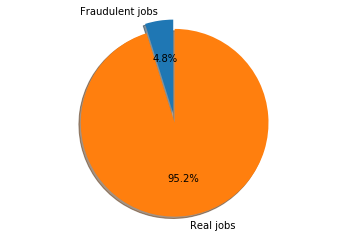

In [12]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fraudulent jobs', 'Real jobs'
sizes = [len(data[data['fraudulent']==1]), len(data[data['fraudulent']==0])]
explode = (0.1, 0)  # only "explode" the 1st fraudulent slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The percentage of fake jobs is 4% which means the ratio of real vs fake jobs is 96:4, which makes it a highly unbalanced data.
Let's look at one observation corresponding to faudulent job. This almost doesn't contain details other than few.

In [13]:
data.iloc[17531]

job_id                                                             17532
title                  Data Entry Admin/Clerical Positions - Work Fro...
location                                                   US, NE, Omaha
department                                                           NaN
salary_range                                                         NaN
company_profile                                                      NaN
description            ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...
requirements                                                         NaN
benefits                                                             NaN
telecommuting                                                          0
has_company_logo                                                       0
has_questions                                                          0
employment_type                                                      NaN
required_experience                                

In [14]:
data.isna().sum( )

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

There are plenty of null values and we need to analyse them in order to find out if we need to impute them. First we will look at department and salary_range as they contain very large number of null values.

In [15]:
# Find our what percentage of data contains null values
print(data['salary_range'].isna().sum( )*100/len(data))
print(100*data['department'].isna().sum( )/len(data))

83.95973154362416
64.58053691275168


Salary_range and department have very high percentage of null values (84% and 64% respectively). So these won't be very useful for our analysis. Hence there is no harm in getting rid of them.

In [16]:
data = data.drop(columns=['salary_range', 'department', 'job_id', 'title'])

For the other attributes, instead of getting rid of the entries, we can set a dummy value such as "NA" to indicate that the values wer not present for these attributes.

In [17]:
data = data.fillna('NoValue')

For few records the location value contains long text such as : 'GB, , See the Requirements section for areas and locations available'. Replacing the whole string with GB only.

In [18]:
#Removing unnecessary texts from location
data['location'] = data['location'].replace(to_replace='GB, , See the Requirements section for areas and locations available', value='GB')

In [19]:
#Extracting city and country from location values
data['country_code'] = data['location'].str.split(',', expand=True)[0]
data['city'] = data['location'].str.split(',', expand=True)[2]
data = data.drop(columns=['location'])

Let's look at what the columns 'company_profile', 'description', 'requirements' and 'benefits' contain. Looks like they contain a lot of text. So in order to make them useful we will have to extract tokens/keywords out of them, which we will later in this project.

In [20]:
# Sample value for Company_profile, description, requirements taken from first entry
pprint.pprint(data.iloc[0]['company_profile'])
pprint.pprint(data.iloc[0]['description'])
pprint.pprint(data.iloc[0]['requirements'])
pprint.pprint(data.iloc[0]['benefits'])

("We're Food52, and we've created a groundbreaking and award-winning cooking "
 'site. We support, connect, and celebrate home cooks, and give them '
 'everything they need in one place.We have a top editorial, business, and '
 "engineering team. We're focused on using technology to find new and better "
 'ways to connect people around their specific food interests, and to offer '
 'them superb, highly curated information about food and cooking. We attract '
 'the most talented home cooks and contributors in the country; we also '
 'publish well-known professionals like Mario Batali, Gwyneth Paltrow, and '
 'Danny Meyer. And we have partnerships with Whole Foods Market and Random '
 'House.Food52 has been named the best food website by the James Beard '
 'Foundation and IACP, and has been featured in the New York Times, NPR, Pando '
 "Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New "
 'York City.')
('Food52, a fast-growing, James Beard Award-winning online foo

We can convert each of these columns into a separate attribute containing the number of words (word count) and then find  the relationships between length of the data with attribute 'fraudulent'. So we will create a new dataset containing only such fields just for our exploration so that running time is faster than using the entire dataset.

In [21]:
data_new = data[['company_profile', 'description', 'requirements', 'benefits', 'fraudulent']]

In [22]:
# Creating word count for the above 4 attributes
import warnings
warnings.filterwarnings('ignore')

data_new['company_profile_wc'] = data_new['company_profile'].str.count(' ')
data_new['description_wc'] = data_new['description'].str.count(' ')
data_new['requirements_wc'] = data_new['requirements'].str.count(' ')
data_new['benefits_wc'] = data_new['benefits'].str.count(' ')

In [23]:
#We will add these values to the main data table
data['company_profile_wc'] = data_new['company_profile_wc']
data['description_wc'] = data_new['description_wc']
data['requirements_wc'] = data_new['requirements_wc']
data['benefits_wc'] = data_new['benefits_wc']

### Plotting graphs
Now we can plot graphs between word count and fraudulent in order to analyse if the amount of text has any relationship with the frauduent nature of the job post.

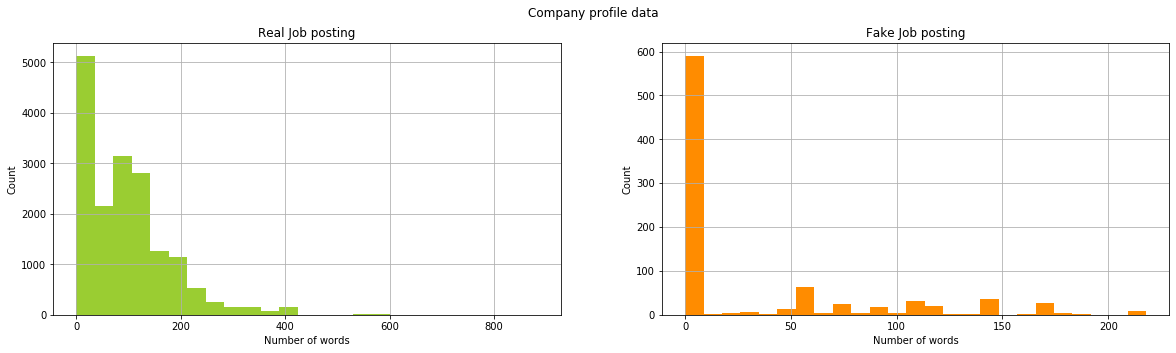

In [22]:
# the distribution of Company_profile data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = data_new[data_new['fraudulent']==0]['company_profile_wc'].values
plot1 = axes[0].hist(y1, 25, facecolor='yellowgreen')

y2 = data_new[data_new['fraudulent']==1]['company_profile_wc'].values
plot2 = axes[1].hist(y2, 25, facecolor='darkorange')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

axes[0].set_title("Real Job posting")
axes[1].set_title("Fake Job posting")
fig.suptitle("Company profile data")
plt.show()

Looks like most fake jobs don't have much text as part of the company description. Let's perform similar analysis for other attributes.

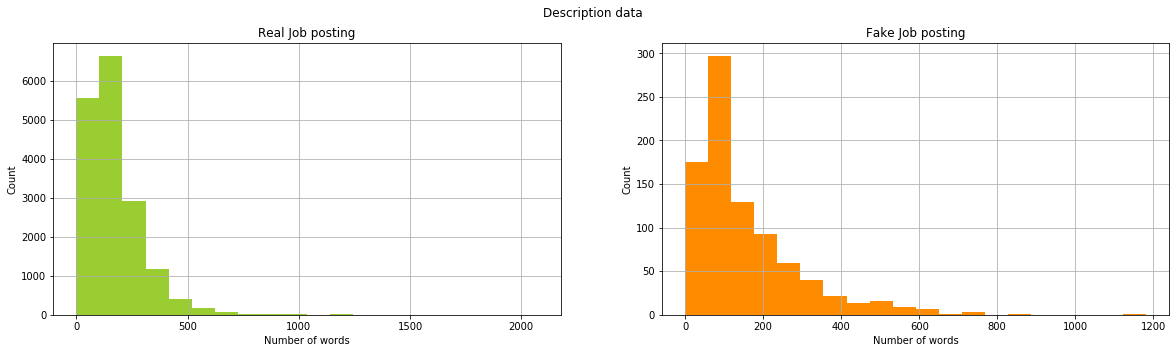

In [23]:
# the job description data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = data_new[data_new["fraudulent"]==0]['description_wc'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='yellowgreen')

y2 = data_new[data_new["fraudulent"]==1]['description_wc'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='darkorange')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

axes[0].set_title("Real Job posting")
axes[1].set_title("Fake Job posting")
fig.suptitle("Description data")
plt.show()

It doesn't look like there is much difference in the amount of words for job description between real and fake jobs. So number of words for the attribute "description" may not be too useful for our analysis.

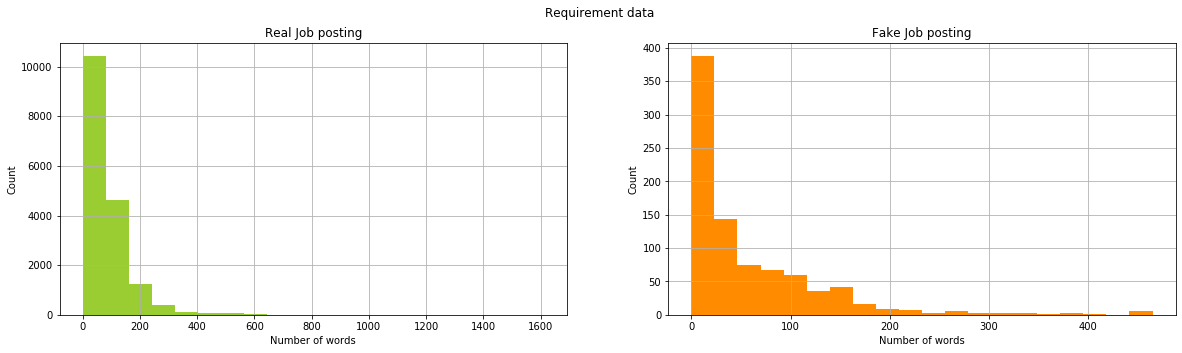

In [24]:
# the distribution of requirement data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = data_new[data_new["fraudulent"]==0]['requirements_wc'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='yellowgreen')

y2 = data_new[data_new["fraudulent"]==1]['requirements_wc'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='darkorange')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

axes[0].set_title("Real Job posting")
axes[1].set_title("Fake Job posting")
fig.suptitle("Requirement data")
plt.show()

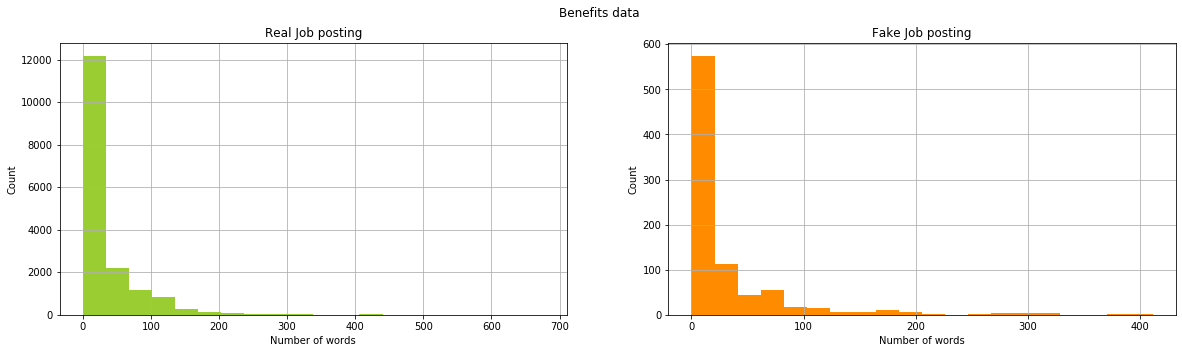

In [25]:
# the histogram of benefits data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = data_new[data_new["fraudulent"]==0]['benefits_wc'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='yellowgreen')

y2 = data_new[data_new["fraudulent"]==1]['benefits_wc'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='darkorange')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

axes[0].set_title("Real Job posting")
axes[1].set_title("Fake Job posting")
fig.suptitle("Benefits data")
plt.show()

Not much difference found in number of words in requirement or benefits. Let's look at required experience.

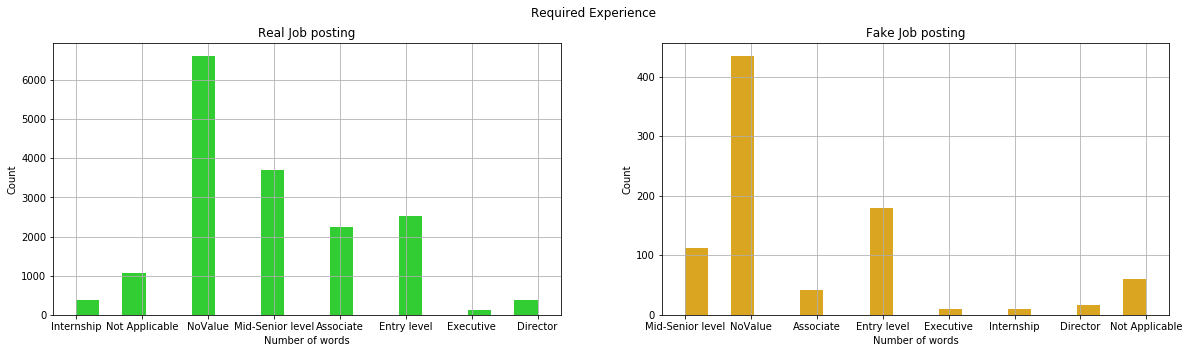

In [24]:
#required_experience
data_exp = data[['required_experience', 'fraudulent']]

# the histogram of benefits data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = data_exp[data_exp["fraudulent"]==0]['required_experience'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = data_exp[data_exp["fraudulent"]==1]['required_experience'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

axes[0].set_title("Real Job posting")
axes[1].set_title("Fake Job posting")
fig.suptitle("Required Experience")
plt.show()

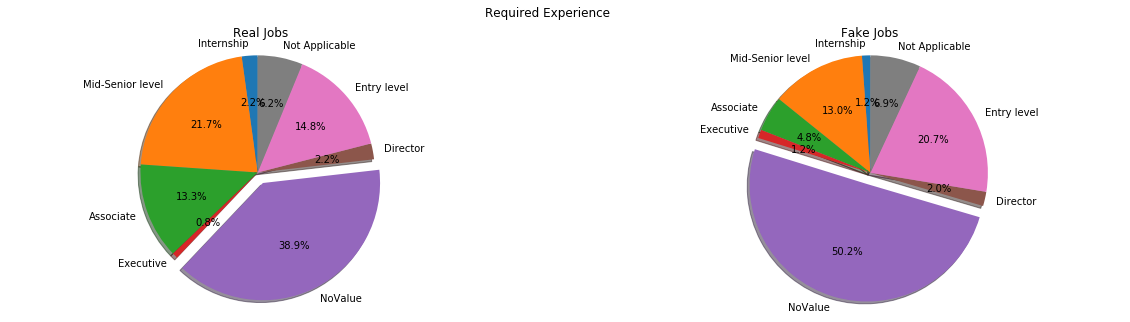

In [82]:
# Required Experience
import matplotlib.pyplot as plt

data_real = data[data['fraudulent']==0]
data_fake = data[data['fraudulent']==1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sizes1 = [len(data_real[data_real['required_experience']=='Internship']),len(data_real[data_real['required_experience']=='Mid-Senior level']),
          len(data_real[data_real['required_experience']=='Associate']),len(data_real[data_real['required_experience']=='Executive']),
          len(data_real[data_real['required_experience']=='NoValue']),len(data_real[data_real['required_experience']=='Director']),
          len(data_real[data_real['required_experience']=='Entry level']),len(data_real[data_real['required_experience']=='Not Applicable'])]
explode = (0, 0, 0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

axes[0].pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].axis('equal') 

labels = 'Internship', 'Mid-Senior level', 'Associate', 'Executive', 'NoValue', 'Director', 'Entry level', "Not Applicable"
sizes2 = [len(data_fake[data_fake['required_experience']=='Internship']),len(data_fake[data_fake['required_experience']=='Mid-Senior level']),
          len(data_fake[data_fake['required_experience']=='Associate']),len(data_fake[data_fake['required_experience']=='Executive']),
          len(data_fake[data_fake['required_experience']=='NoValue']),len(data_fake[data_fake['required_experience']=='Director']),
          len(data_fake[data_fake['required_experience']=='Entry level']),len(data_fake[data_fake['required_experience']=='Not Applicable'])]
#explode2 = (0, 0, 0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

axes[1].pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

axes[0].set_title("Real Jobs")
axes[1].set_title("Fake Jobs")
fig.suptitle("Required Experience")
plt.show()

We see an increased amount of job posts where required experience was missing for fraudulent jobs. Also we may notice that percentage of "Entry level" roles are more for fake jobs as compared to the real jobs.

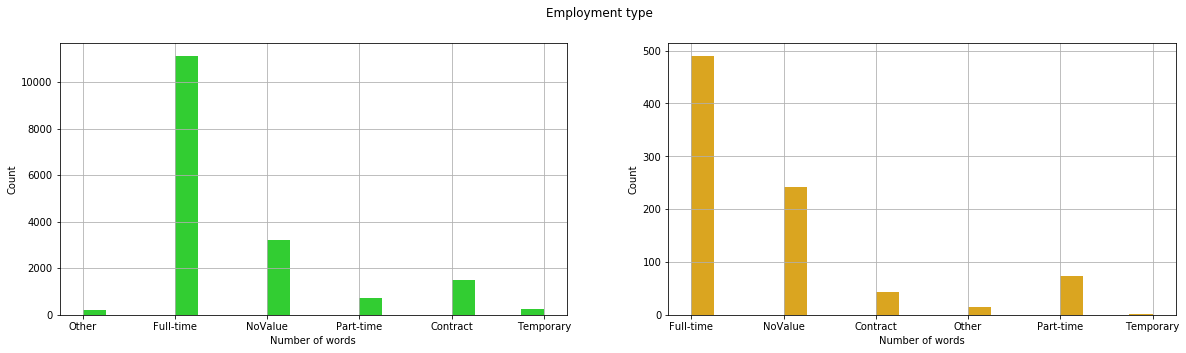

In [27]:
# employment_type
plot_data = data[['employment_type', 'fraudulent']]

# the histogram of benefits data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = plot_data[plot_data["fraudulent"]==0]['employment_type'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = plot_data[plot_data["fraudulent"]==1]['employment_type'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

fig.suptitle("Employment type")
plt.show()

Not much difference in employmet type

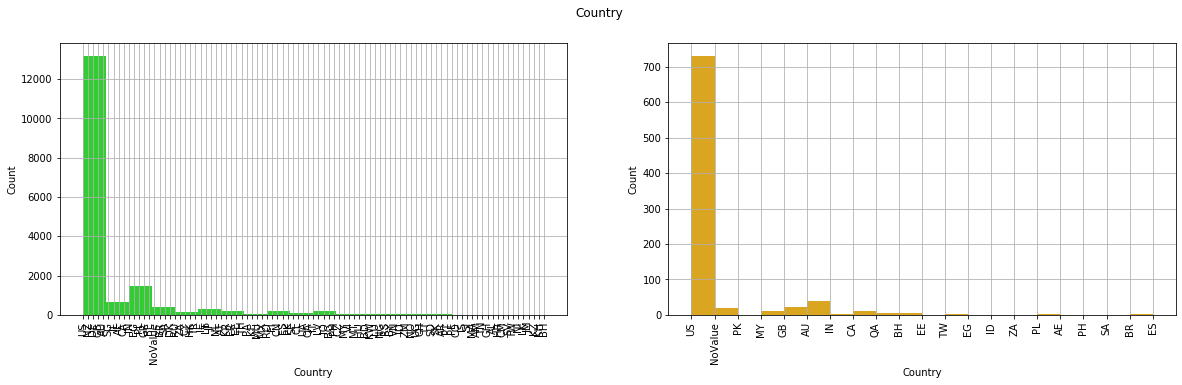

In [56]:
# By country
plot_data = data[['country_code', 'fraudulent']]

# the histogram of benefits data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
#.xticks(rotation=45)

y1 = plot_data[plot_data["fraudulent"]==0]['country_code'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = plot_data[plot_data["fraudulent"]==1]['country_code'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Country',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

fig.suptitle("Country")
#plt.xticks(rotation=45)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

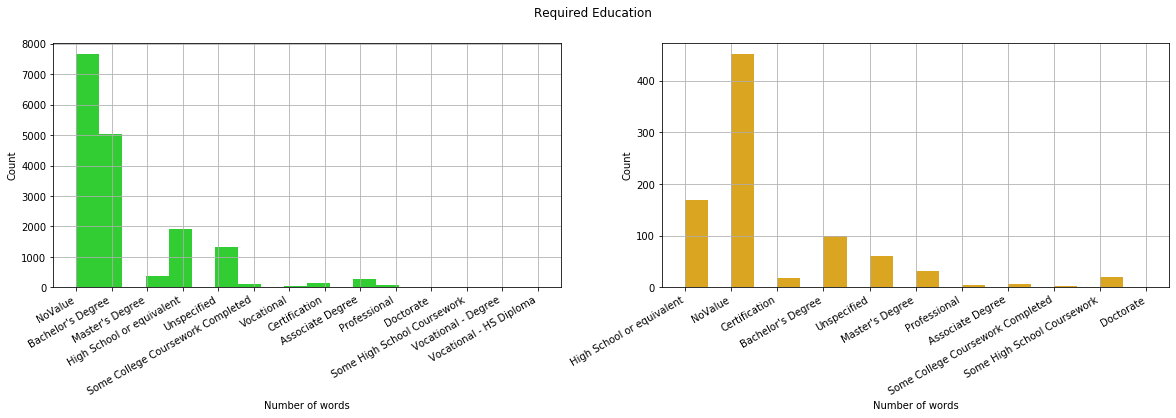

In [29]:
# Required education
plot_data = data[['required_education', 'fraudulent']]

# the histogram of benefits data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = plot_data[plot_data["fraudulent"]==0]['required_education'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = plot_data[plot_data["fraudulent"]==1]['required_education'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)
    axis.set_xlabel('Number of words',fontsize=10)
    axis.set_ylabel('Count',fontsize=10)

fig.suptitle("Required Education")
#plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.show()

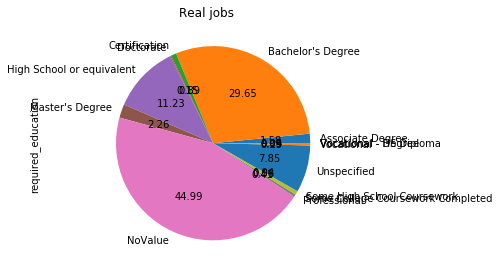

In [83]:
#Required education [Real jobs]

data_real['required_education'].groupby(data_real['required_education']).count().plot(kind='pie', autopct='%.2f')

plt.axis('equal')
plt.suptitle("Real jobs")
plt.show()

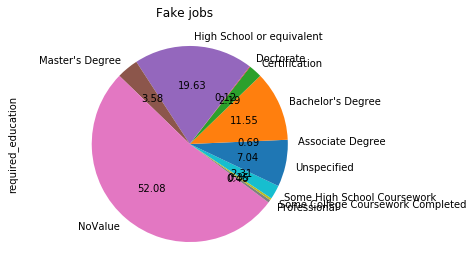

In [84]:
plot2 = data_fake['required_education'].groupby(data_fake['required_education']).count().plot(kind='pie', autopct='%.2f')
plt.axis('equal')
plt.suptitle("Fake jobs")
plt.show()

For fraudulent jobs they are slightly more inclined towards High school graduates. Also the percentage of NA values is more for fake as compared to real jobs.

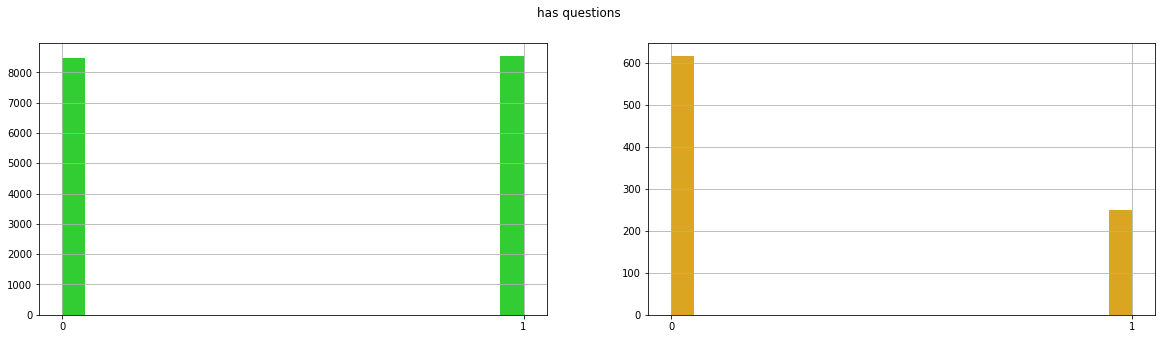

In [49]:
# has_questions
import matplotlib.pyplot as plt

plot_data = data[['has_questions', 'fraudulent']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = plot_data[plot_data["fraudulent"]==0]['has_questions'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = plot_data[plot_data["fraudulent"]==1]['has_questions'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)
    
fig.suptitle("has questions")
axes[0].set_xticks([0, 1])
axes[1].set_xticks([0, 1])
plt.show()

More than 2/3rd data from fraudulent jobs don't have screening questions (as mentioned in "has questions" attribute), while this proportion is 1/2 for real jobs. Which means most fraudulent jobs aren't going to do any screening process before recruitment, which is kind of suspicious.

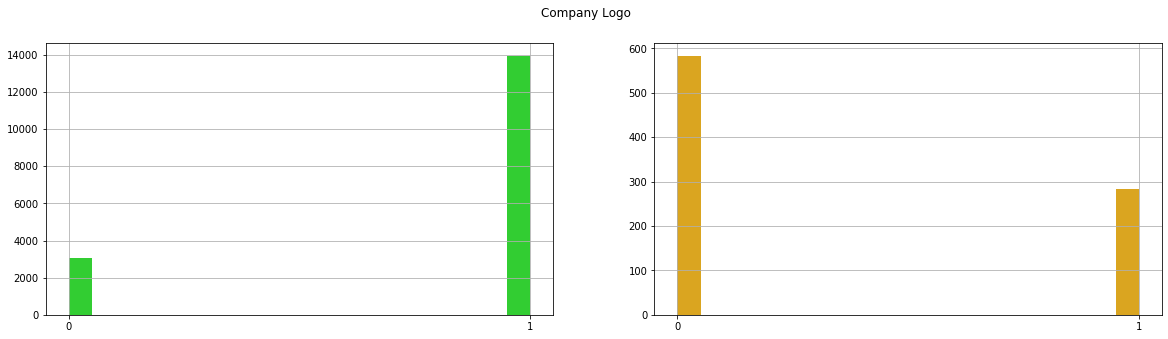

In [50]:
#Has company logo
plot_data = data[['has_company_logo', 'fraudulent']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

y1 = plot_data[plot_data["fraudulent"]==0]['has_company_logo'].values
plot1 = axes[0].hist(y1, 20, density=False, facecolor='limegreen')

y2 = plot_data[plot_data["fraudulent"]==1]['has_company_logo'].values
plot2 = axes[1].hist(y2, 20, density=False, facecolor='goldenrod')

for axis in axes:
    axis.grid(True)

axes[0].set_xticks([0, 1])
axes[1].set_xticks([0, 1])
fig.suptitle("Company Logo")
plt.show()

So it's evident from the above plot, that fake jobs mostly don't contain company description or company logo.

In [32]:
data['function'].unique()

array(['Marketing', 'Customer Service', 'NoValue', 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

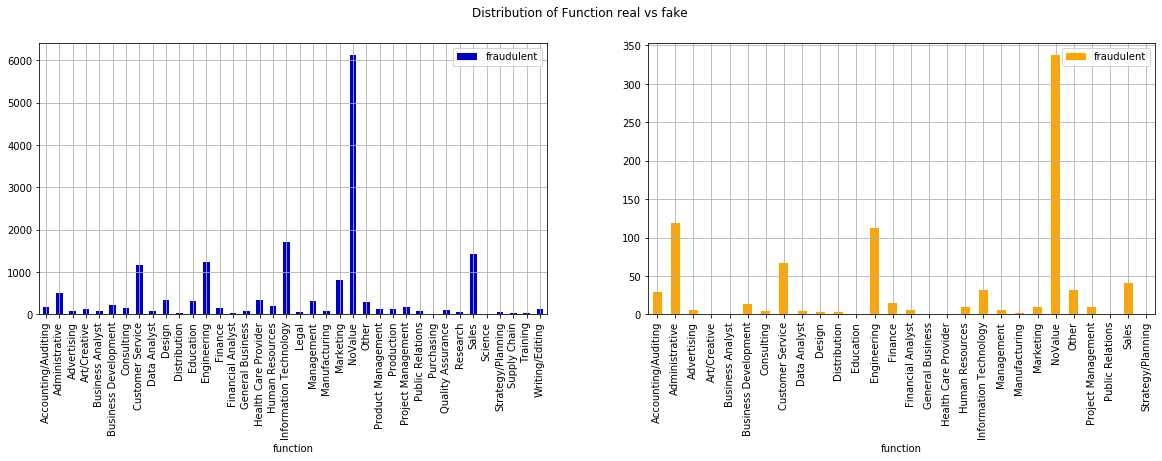

In [33]:
# Function
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plot_data = data[['function', 'fraudulent']]

y1 = plot_data[plot_data["fraudulent"]==0].groupby(['function']).count()
y1.plot(ax=axes[0], kind='bar', facecolor='mediumblue')

y2 = plot_data[plot_data["fraudulent"]==1].groupby(['function']).count()
y2.plot(ax=axes[1], kind='bar', facecolor='orange')

for axis in axes:
   axis.grid(True)

fig.suptitle("Distribution of Function real vs fake")
plt.show()

No distinct difference observed here either.

In [34]:
# Merging of columns containing unstructured data
data['combined'] = data['company_profile'] + " " + data['description'] + " " + data['requirements'] + " " + data['benefits']
data = data.drop(columns=['company_profile', 'description', 'requirements', 'benefits'])

In [35]:
data1 = data['combined']
data1[0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub,

We will try to apply logistic regression with all variables except company_profile, description, requirements and benefits and analyse the accuracy.

In [36]:
#One-hot encoding for categorical columns
columns_onehot=["employment_type","required_experience","required_education","industry","function"]

In [37]:
for column in columns_onehot:
    encoded = pd.get_dummies(data[column])
    data = pd.concat([data, encoded], axis = 1)

In [38]:
data.shape

(17880, 214)

We will remove the attributes for which one-hot encoding is done. Also we will remove attributes which are not important for our analysis further.

In [39]:
data = data.drop(columns=['combined','city',"country_code","employment_type","required_experience","required_education","industry","function"])

In [40]:
target = data['fraudulent']

features = data.drop('fraudulent', axis = 1)

#Creating a 70:15:15 train:validation:test datasets by splitting the main dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=5)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=5)

In [41]:
logreg = LogisticRegression()
_ = logreg.fit(X_train, y_train)

print(classification_report(y_dev, logreg.predict(X_dev)))

y_actu = pd.Series(y_dev, name='Actual')
y_pred_s1 = pd.Series(logreg.predict(X_dev), name='Predicted')
#confusion_matrix = pd.crosstab(y_actu,y_pred_s1)
print(metrics.confusion_matrix(y_actu,y_pred_s1,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1280
           1       0.60      0.15      0.24        61

    accuracy                           0.96      1341
   macro avg       0.78      0.57      0.61      1341
weighted avg       0.94      0.96      0.94      1341

[[1274    6]
 [  52    9]]


### Word Tokenization

As we have observed, most of our attributes contain unstructured data, so if we can convert them into token after removing special characters, single letter words, stop words etc then we can find out relationship between tokens and frauduent data. In order to create them first we will have to merge all unstructured data into one attribute called "tokens".

We will remove special characters except "-" as getting rid of this character may result in loss of meaning for some words such as: "well-known". We will also get rid of single letter words, numbers and also convert everything to lower case in order to eliminate case sensitiveness of our code.

Stop words such as a, an, the, for etc are going to top the list of most frequently used words while providing very insight into the data. Hence it's best if we remove them.

In [42]:
stop_words = list(stopwords.words('english'))

In [43]:
tokens = []

for i in data1:
    
    # Removing special characters except -
    i = re.sub(r'[!@#$%^&*()_+{}|:<>?,./;[\]=\'"]', ' ', i)
    
    #convert to lower case
    i = i.lower()
    
    #Removing single letter words
    i = re.sub(r'(?i)\b[a-z]\b', ' ', i)
    
    #Removing numbers
    i = re.sub("[0-9]", "", str(i))
       
    # tokenize
    i = i.split()
    
    # Removing stop words from tokens
    i = [w for w in i if not w in stop_words] 
    
    # Removing extra whitespace
    i = " ".join(i).split(' ')
    
    tokens.append(i)

In [44]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
from nltk.corpus import wordnet
    
#Part of speech tagging (POS)        
def get_wordnet_pos(word):
#Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)    

In [46]:
#Lemmatizing
lemmatizer = WordNetLemmatizer()
lemma=[]

for i in tokens:
    temp = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in i]
    lemma.append(temp)
    #print(j)
    #j=j+1

In [47]:
lemma_combined=[]
for i in lemma:
    temp=" ".join(i)
    lemma_combined.append(temp)

In [48]:
data['tokens']=lemma
data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,company_profile_wc,description_wc,requirements_wc,benefits_wc,Contract,Full-time,...,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing,tokens
0,0,1,0,0,140,123,114,0,0,0,...,0,0,0,0,0,0,0,0,0,"[food, create, groundbreaking, award-winning, ..."
1,0,1,0,0,149,308,186,224,0,1,...,0,0,0,0,0,0,0,0,0,"[second, world, cloud, video, production, serv..."
2,0,1,0,0,135,49,163,0,0,0,...,0,0,0,0,0,0,0,0,0,"[valor, service, provide, workforce, solution,..."
3,0,1,0,0,84,344,173,95,0,1,...,0,0,0,1,0,0,0,0,0,"[passion, improve, quality, life, geography, h..."
4,0,1,1,0,204,181,88,2,0,1,...,0,0,0,0,0,0,0,0,0,"[spotsource, solution, llc, global, human, cap..."


As we can see, the text looks neat and converted into tokens. We can take a subset of all tokens from the dataset for fake jobs only and form a word cloud for most occurring words.

In [228]:
# Merging tokens for all fraudulent data
tmp = data[data['fraudulent']==1]['tokens']

tokens_fake = []
for i in tmp:
    tokens_fake = tokens_fake + i

Now we can form a word cloud with the most frequently used tokens. Bigger the size of the font means more frequently the token appeared in our dataset. This word cloud is for fraudulent data.

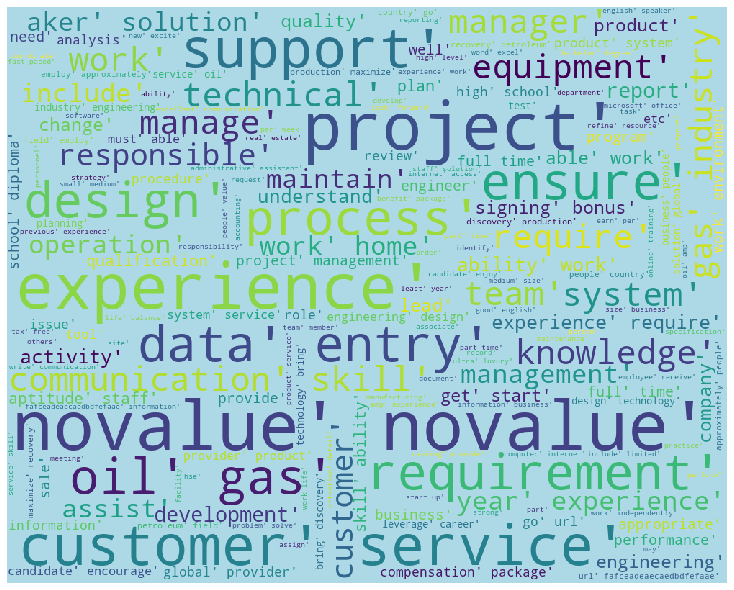

In [229]:
# Wordcloud for fake data
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='lightblue',
                min_font_size = 10).generate(str(tokens_fake)) 
#  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Apart from some regular and not-so-suspicious words, we can see that one of the most common characteristic for fraudulent jobs is missing values.

In [49]:
#Using CountVectorizer 
vectorizer = CountVectorizer(min_df=0.05,ngram_range=(1, 2))
temp=vectorizer.fit_transform(lemma_combined)

In [50]:
vectorized_df = pd.DataFrame(temp.todense(), columns = vectorizer.get_feature_names())
data_final = pd.concat([data, vectorized_df], axis = 1)
data_final.shape

(17880, 1043)

We have converted all categorical and text fields to numerical data now. We can split the model into train and test set and start training machien learning models.

In [54]:
target = data_final['fraudulent']

features = data_final.drop(['fraudulent','tokens'], axis = 1)

#Creating a 70:15:15 train:validation:test datasets by splitting the main dataset
X_train, X_dev, y_train, y_dev = train_test_split(features, target, test_size=0.3, random_state=5)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=5)

In [55]:
print(X_train.shape, X_dev.shape, X_test.shape)

(12516, 1041) (2682, 1041) (2682, 1041)


#### Logistic regression

In [56]:
y_actu = pd.Series(y_dev, name='Actual')

param_grid = [
    {'C': [1, 5, 10], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid = param_grid)
logreg.fit(X_train, y_train)

log_pred = pd.Series(logreg.predict(X_dev), name='Predicted')

print(classification_report(y_dev, log_pred))
print(metrics.confusion_matrix(y_actu, log_pred, labels=[0,1]))

print(logreg.best_score_)
print(logreg.best_params_)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2536
           1       0.81      0.66      0.73       146

    accuracy                           0.97      2682
   macro avg       0.90      0.82      0.86      2682
weighted avg       0.97      0.97      0.97      2682

[[2514   22]
 [  50   96]]
0.9734739533397252
{'C': 1, 'penalty': 'l2'}


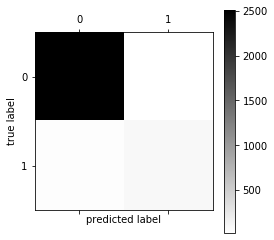

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

_ = plt.matshow(confusion_matrix(y_dev, logreg.predict(X_dev)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

We are getting decent accuracy with this model. However we will need to try few other models as well.

Logistic: f1=0.727 auc=0.748


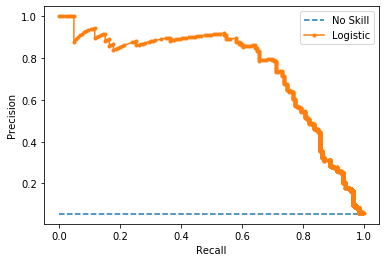

In [58]:
from sklearn.metrics import precision_recall_curve

# predict probabilities
lr_probs = logreg.predict_proba(X_dev)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_dev, lr_probs)

# calculate scores
lr_f1, lr_auc = f1_score(y_dev, log_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_dev[y_dev==1]) / len(y_dev)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Without applying any machine learning model, if we look at the prediction power of the dataset, we get very poor precision; this is marked as "no skill". However the precision-recall curve for our Logistic regression is way above the no skill line.

We can look at other machine learning models to see if they can perform better than the Logistic regression model.
#### Support Vector Classifier

In [59]:
svc = SVC(class_weight='balanced', probability=True)

param_grid = dict(kernel = ['linear', 'rbf'])

grid_svc = GridSearchCV(svc, param_grid)
grid_svc.fit(X_train, y_train)
svc_pred = grid_svc.predict(X_dev)

print (classification_report(y_dev, svc_pred))

print(metrics.confusion_matrix(y_dev,svc_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2536
           1       0.74      0.73      0.73       146

    accuracy                           0.97      2682
   macro avg       0.86      0.86      0.86      2682
weighted avg       0.97      0.97      0.97      2682

[[2499   37]
 [  40  106]]


In [233]:
grid_svc.best_params_

{'kernel': 'linear'}

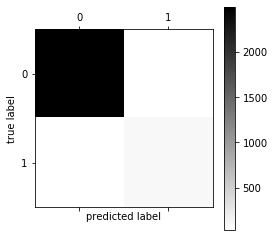

In [206]:
_ = plt.matshow(confusion_matrix(y_dev, grid_svc.predict(X_dev)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

Logistic: f1=0.734 auc=0.703


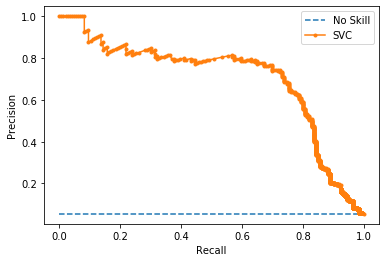

In [61]:
# predict probabilities
lr_probs=grid_svc.predict_proba(X_dev)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_dev, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_dev, svc_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='SVC')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Neural Network MLP Classifier

In [62]:
param_grid = [
    {'solver': ['adam', 'sgd'], 'hidden_layer_sizes': [50,  100, 200], 'max_iter': [200, 500, 1000]}
]

mlp = GridSearchCV(MLPClassifier(), param_grid)

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_dev)

print (classification_report(y_dev, mlp_pred))
print(metrics.confusion_matrix(y_actu, mlp_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2536
           1       0.89      0.69      0.78       146

    accuracy                           0.98      2682
   macro avg       0.94      0.84      0.88      2682
weighted avg       0.98      0.98      0.98      2682

[[2524   12]
 [  45  101]]


We are getting better accuracy and f1-score after tuning.

In [283]:
print(mlp.best_params_)

y_actu = pd.Series(list(y_dev), name='Actual')
y_pred = pd.Series(list(mlp_pred), name='Predicted')

confusion = pd.crosstab(y_actu,y_pred)
print(confusion)

{'hidden_layer_sizes': 200, 'max_iter': 500, 'solver': 'adam'}
Predicted     0    1
Actual              
0          2524   12
1            45  101


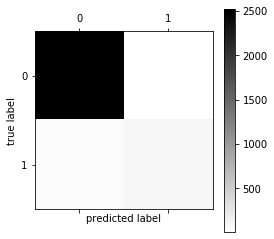

In [207]:
_ = plt.matshow(confusion_matrix(y_dev, mlp.predict(X_dev)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

Logistic: f1=0.780 auc=0.837


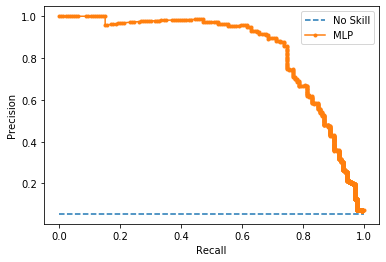

In [63]:
# predict probabilities
lr_probs=mlp.predict_proba(X_dev)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_dev, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_dev, mlp_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='MLP')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

There is a huge improvement. So we have selected 3 models with Logistic regression model as the benchmark model as it's the simplest model. We need to perform some statistical testing in order to decide the best model from these three. We will use the held-out test data to decide our final model.

### Finalising a model

In [275]:
from collections import Counter

NUM_FOLDS = 10
test_folds = np.array_split(y_test, NUM_FOLDS)
logistic_folds = np.array_split(logreg.predict(X_test), NUM_FOLDS)
svc_folds = np.array_split(grid_svc.predict(X_test), NUM_FOLDS)
mlp_folds = np.array_split(mlp.predict(X_test), NUM_FOLDS)

freq = Counter(test_folds[1])
print (freq)

Counter({0: 255, 1: 14})


In [276]:
PRF_KWARGS = {
    'pos_label': 1,     # 1 is the positive spam label
    'average': 'binary' # evaluate p/r/f of the positive label
}

def score_folds(actu, exp, scorer, **kwargs):
    for x, y in zip(actu, exp):
        yield scorer(x, y, **kwargs)
        
#Calculating f1 scores across folds for logistic and MLP classifier models
logistic_f1 = list(score_folds(test_folds, logistic_folds, f1_score))
svc_f1 = list(score_folds(test_folds, svc_folds, f1_score))
mlp_f1 = list(score_folds(test_folds, mlp_folds, f1_score))

print("System 1 mu, sigma:", np.mean(logistic_f1), np.std(logistic_f1))
print("System 2 mu, sigma:", np.mean(svc_f1), np.std(svc_f1))
print("System 3 mu, sigma:", np.mean(mlp_f1), np.std(mlp_f1))

System 1 mu, sigma: 0.6857583950388304 0.13680559493551273
System 2 mu, sigma: 0.652010999721526 0.12772115321040656
System 3 mu, sigma: 0.7856841706387986 0.100419468631376


In [277]:
# one-sided paired t-test
def ttest_across_folds(actu, sys1, sys2, scorer, **kwargs):
    sys1_scores = list(score_folds(actu, sys1, scorer, **kwargs))
    sys2_scores = list(score_folds(actu, sys2, scorer, **kwargs))
    print("t-statistic for H1 sys1 (mu={:.3f}) > sys2 (mu={:.3f}) by {}:"\
          .format(np.mean(sys1_scores), np.mean(sys2_scores), scorer.__name__))
    print(stats.ttest_rel(sys1_scores, sys2_scores).statistic)
    print("p-value for one-tailed t-test by {}:", scorer.__name__)
    print(stats.ttest_rel(sys1_scores, sys2_scores).pvalue*0.5)

#ttest_across_folds(test_folds, logistic_folds, mlp_folds, accuracy_score)
ttest_across_folds(test_folds, logistic_folds, mlp_folds, f1_score, **PRF_KWARGS)
ttest_across_folds(test_folds, logistic_folds, svc_folds, f1_score, **PRF_KWARGS)
ttest_across_folds(test_folds, svc_folds, mlp_folds, f1_score, **PRF_KWARGS)

t-statistic for H1 sys1 (mu=0.686) > sys2 (mu=0.786) by f1_score:
-4.362055142405873
p-value for one-tailed t-test by {}: f1_score
0.0009090055507136094
t-statistic for H1 sys1 (mu=0.686) > sys2 (mu=0.652) by f1_score:
1.3759511904776356
p-value for one-tailed t-test by {}: f1_score
0.10105253972115394
t-statistic for H1 sys1 (mu=0.652) > sys2 (mu=0.786) by f1_score:
-4.47171206055221
p-value for one-tailed t-test by {}: f1_score
0.0007754166445684423


From the above result we can conclude that there isn't much difference between prediction power of Logistic and SVC (because p-value > 0.5). However Neural Network MLP classifier is different from the other 2 models. And since the t-statistics for both the t-tests are < 0, we can conclude that Logistic < MLP and SVC < MLP.

In [278]:
print (classification_report(y_test, final_pred))

y_actu = pd.Series(list(y_test), name='Actual')
y_pred = pd.Series(list(final_pred), name='Predicted')

confusion = pd.crosstab(y_actu,y_pred)
print(confusion)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2569
           1       0.86      0.74      0.80       113

    accuracy                           0.98      2682
   macro avg       0.92      0.87      0.89      2682
weighted avg       0.98      0.98      0.98      2682

Predicted     0   1
Actual             
0          2555  14
1            29  84


Neural Network MLP classifier: f1=0.796 auc=0.821


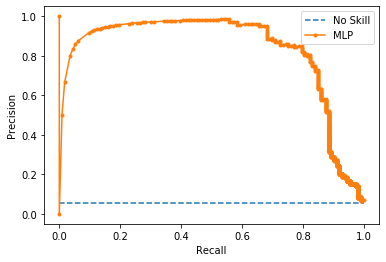

In [279]:
# predict probabilities
lr_probs=mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# calculate scores
final_pred = mlp.predict(X_test)
lr_f1, lr_auc = f1_score(y_test, final_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Neural Network MLP classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='MLP')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

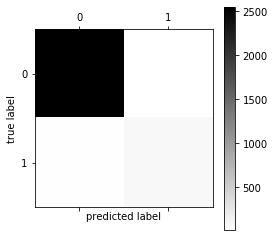

In [280]:
_ = plt.matshow(confusion_matrix(y_test, mlp.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

Research question:
H0: There is no significant relationship between any of the attributes of a job posting and the authenticity of the job post. 
i.e predicted output = Mean of target variable of the entire dataset
H1: There is significant relationship between one or more attributes and authenticity of the job post.
i.e predicted output != mean of target variable of the entire dataset

We could perform a paired t-test between y values predicted from our final model and y values from the held-out test data and compare them. In this case the null hypothesis would be that they both are same. We can then reject the null hypothesis if the p-value of this test is < 0.05. The alternate hypothesis is that there is significance difference between these 2 predictions, which means there is no sufficient evidence that there is significant relationship between dependent and independent variables.

In [281]:
def ttest(actu, exp):
    for x, y in zip(actu, exp):
        yield  stats.ttest_rel(x, y).pvalue

print("p-values for null hypothesis that predicted values from our model and actual values are same across folds: ", np.mean(list(ttest(mlp_folds, test_folds))))

p-values for null hypothesis that predicted values from our model and actual values are same across folds:  0.34732698702118453


Since the average p-value across all folds is > 0.05, we fail to reject the null hypothesis. Let's look at confidence interval.

In [282]:
from sklearn.metrics import mean_squared_error
import math
se = math.sqrt(mean_squared_error(y_test, final_pred))

print('Standard error:', se)
print('Predictions will be within {:.1f} at 95% confidence according to test data.'.format(2*se))


Standard error: 0.12662073817043068
Predictions will be within 0.3 at 95% confidence according to test data.


Looks like our model can predict within a value of 0.3 at 95% confidence according to test data.

## Thank you for reviewing